In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# getting the data

url_link = 'https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv'
df = pd.read_csv(url_link)
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [3]:
df.shape

(25, 2)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [5]:
df.isnull().sum()

Hours     0
Scores    0
dtype: int64

<AxesSubplot:xlabel='Hours', ylabel='Scores'>

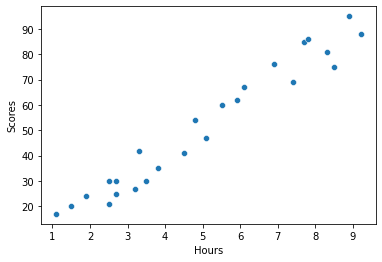

In [6]:
sns.scatterplot(x = df.Hours, y = df.Scores)

In [7]:
# From the above plot we can see that the more the time, the student studies for the more are his chances to score better

# so we can apply simple linear regression for the further predictions.

In [8]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

In [9]:
X.shape, y.shape

((25, 1), (25,))

In [10]:
type(X), type(y)

(numpy.ndarray, numpy.ndarray)

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train , y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [12]:
y_test

array([20, 27, 69, 30, 62], dtype=int64)

## plotting the best fit line


In [13]:
from sklearn.linear_model import LinearRegression

In [14]:
model = LinearRegression()
model.fit(X_train, y_train)

print("Coefficient : {}".format(model.coef_[0]))
print("intercept : {}".format(model.intercept_))

Coefficient : 9.910656480642237
intercept : 2.018160041434683


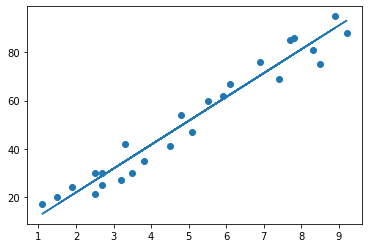

In [15]:
best_equation = model.coef_*X + model.intercept_

plt.plot(X, best_equation)
plt.scatter(X, y)

In [16]:
X_test

array([[1.5],
       [3.2],
       [7.4],
       [2.5],
       [5.9]])

In [17]:
y_pred = model.predict(X_test)

In [18]:
y_pred

array([16.88414476, 33.73226078, 75.357018  , 26.79480124, 60.49103328])

In [19]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math

In [20]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = math.sqrt(mean_squared_error(y_test, y_pred))

print("Mean_Square_error : {}".format(mse))
print("Mean_Absolute_error : {}".format(mae))
print("Root_Mean_Square_error : {}".format(rmse))


Mean_Square_error : 21.5987693072174
Mean_Absolute_error : 4.183859899002975
Root_Mean_Square_error : 4.6474476121003665


## What will be predicted score if a student studies for 9.25 hrs/ day?

In [21]:
X_test_final = X_test.reshape(-1)


In [22]:
final_df_output = pd.DataFrame({ 'Hours': X_test_final,'Predicted': y_pred})

In [23]:
final_df_output.head()

,Hours,Predicted
0,1.5,16.884145
1,3.2,33.732261
2,7.4,75.357018
3,2.5,26.794801
4,5.9,60.491033


In [27]:
val = model.predict([[9.25]])
val_final = np.round_(val, 3)

In [25]:
print("The Predicted Score, if the student studies for 9.25 hours/ day = {}".format(val_final[0]))

The Predicted Score, if the student studies for 9.25 hours/ day = 93.692


## END